In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


data = pd.read_csv('/kaggle/input/twitter-data/processed_twitter_data.csv')
print(data.head())

max_words = 20000  
max_len = 100      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_text'])

sequences = tokenizer.texts_to_sequences(data['processed_text'])

X = pad_sequences(sequences, maxlen=max_len)

y = data['sentiment'].values

comparison_df = pd.DataFrame(X, y)

comparison_df.head(10)

                                      processed_text  sentiment
0  USER URL aww that bummer you shoulda got david...          0
1  is upset that he can update his facebook by te...          0
2  USER dived many time for the ball managed to s...          0
3      my whole body feel itchy and like it on fire           0
4  USER no it not behaving at all mad why am here...          0


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,48,811,7864,11,1842,23,2,43,4,306
0,0,0,0,0,0,0,0,0,0,0,...,4,6,288,378,83,1109,143,39,267,1096
0,0,0,0,0,0,0,0,0,0,0,...,1641,2,844,1041,3,465,34,32,11,3005
0,0,0,0,0,0,0,0,0,0,0,...,5,428,760,90,2823,6,33,4,12,1085
0,0,0,0,0,0,0,0,0,0,0,...,111,60,85,213,27,65,7,31,132,64
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,22,3,428,2109
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,75,489
0,0,0,0,0,0,0,0,0,0,0,...,147,247,243,113,243,50,518,77,68,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,768,72,145,16,4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2397,14


split done


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.7772 - loss: 0.4663 - val_accuracy: 0.8164 - val_loss: 0.4038
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8202 - loss: 0.3997 - val_accuracy: 0.8200 - val_loss: 0.3969
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8314 - loss: 0.3793 - val_accuracy: 0.8213 - val_loss: 0.4005
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8396 - loss: 0.3644 - val_accuracy: 0.8207 - val_loss: 0.3997
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8476 - loss: 0.3482 - val_accuracy: 0.8197 - val_loss: 0.4025
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8193 - loss: 0.4020
Test accuracy: 0.819225013256073


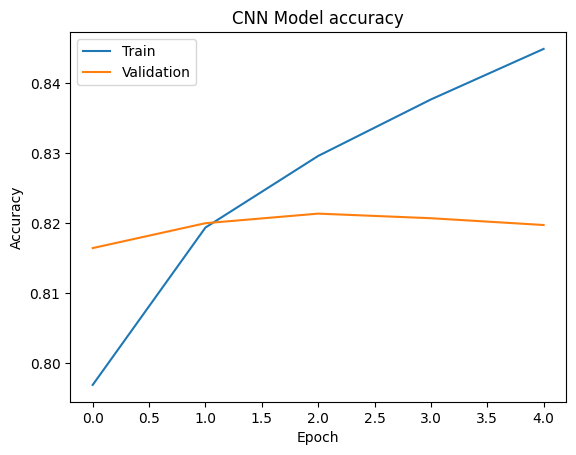

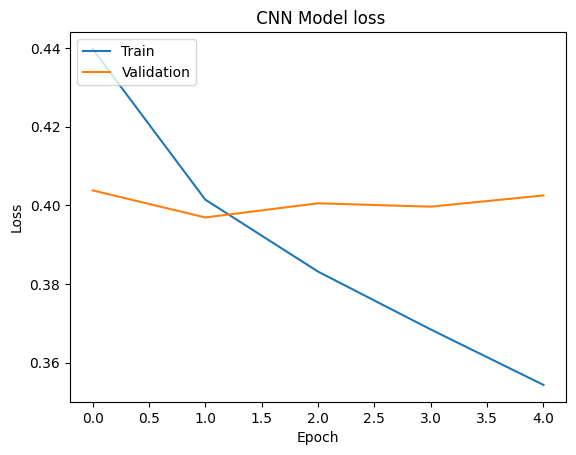

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("split done")

embedding_dim = 100

model_gen = Sequential()
model_gen.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model_gen.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_gen.add(GlobalMaxPooling1D())
model_gen.add(Dropout(0.5))
model_gen.add(Dense(128, activation='relu'))
model_gen.add(Dropout(0.5))
model_gen.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model_gen.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gen = model_gen.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model_gen.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


plt.plot(history_gen.history['accuracy'])
plt.plot(history_gen.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_gen.history['loss'])
plt.plot(history_gen.history['val_loss'])
plt.title(' CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
import pickle

with open('Sentiment-CNN-gen.pickle', 'wb') as file:
    pickle.dump(history_gen, file)
    
model_gen.save('CNN_sentiment_model_gen.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
CNN Model Metrics
Accuracy: 0.8192
Precision: 0.8336
Recall: 0.7991
F1 Score: 0.8160
              precision    recall  f1-score   support

           0       0.81      0.84      0.82    159494
           1       0.83      0.80      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



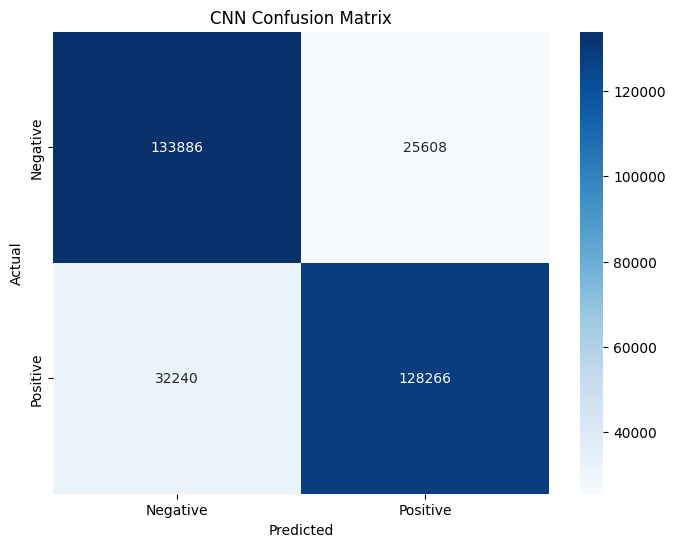

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model_gen.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print('CNN Model Metrics')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CNN Confusion Matrix')
plt.show()

Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 196s 12ms/step - accuracy: 0.7894 - loss: 0.4469 - val_accuracy: 0.8236 - val_loss: 0.3902
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 191s 12ms/step - accuracy: 0.8356 - loss: 0.3695 - val_accuracy: 0.8300 - val_loss: 0.3791
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 190s 12ms/step - accuracy: 0.8530 - loss: 0.3368 - val_accuracy: 0.8305 - val_loss: 0.3813
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 191s 12ms/step - accuracy: 0.8672 - loss: 0.3086 - val_accuracy: 0.8280 - val_loss: 0.3905
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 191s 12ms/step - accuracy: 0.8816 - loss: 0.2787 - val_accuracy: 0.8249 - val_loss: 0.4180
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.8251 - loss: 0.4154
Test accuracy: 0.8246562480926514


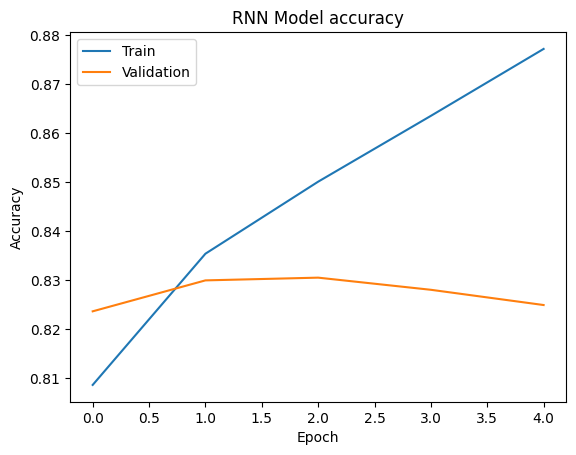

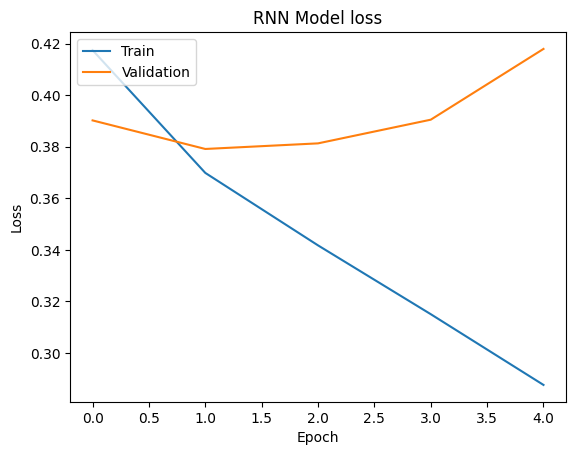

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model_rnn.add(LSTM(128, return_sequences=True))  # LSTM layer
model_rnn.add(LSTM(64))  # Second LSTM layer
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

test_loss_rnn, test_acc_rnn = model_rnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc_rnn}')

plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
import pickle

with open('Sentiment-RNN.pickle', 'wb') as file:
    pickle.dump(history_rnn, file)
    
model_rnn.save('RNN_sentiment_model.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step
RNN Model Metrics
Accuracy: 0.8247
Precision: 0.8250
Recall: 0.8256
F1 Score: 0.8253
              precision    recall  f1-score   support

           0       0.82      0.82      0.82    159494
           1       0.82      0.83      0.83    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



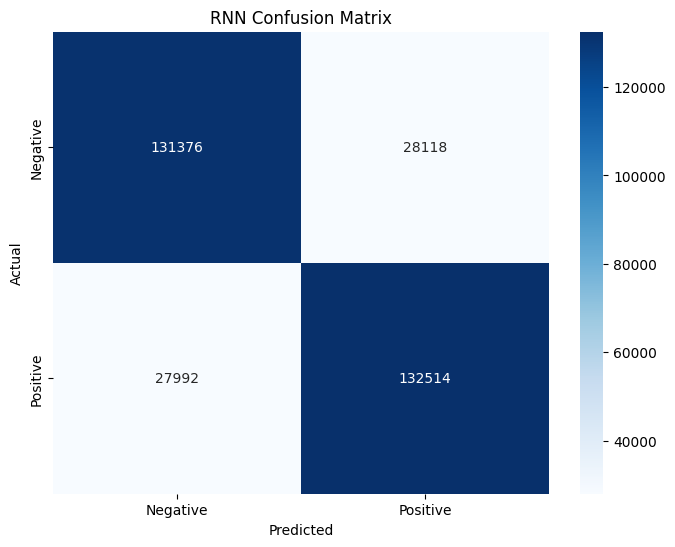

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")

accuracy_rnn = accuracy_score(y_test, y_pred_rnn)

precision_rnn = precision_score(y_test, y_pred_rnn)
recall_rnn = recall_score(y_test, y_pred_rnn)
f1_rnn = f1_score(y_test, y_pred_rnn)

report_rnn = classification_report(y_test, y_pred_rnn)

print('RNN Model Metrics')
print(f"Accuracy: {accuracy_rnn:.4f}")
print(f"Precision: {precision_rnn:.4f}")
print(f"Recall: {recall_rnn:.4f}")
print(f"F1 Score: {f1_rnn:.4f}")
print(report_rnn)

cm_rnn = confusion_matrix(y_test, y_pred_rnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RNN Confusion Matrix')
plt.show()

In [12]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-09-27 13:15:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-27 13:15:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-27 13:15:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

glov

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.7165 - loss: 0.5511 - val_accuracy: 0.7745 - val_loss: 0.4917
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7601 - loss: 0.4960 - val_accuracy: 0.7818 - val_loss: 0.4881
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7689 - loss: 0.4840 - val_accuracy: 0.7870 - val_loss: 0.4807
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.7734 - loss: 0.4768 - val_accuracy: 0.7889 - val_loss: 0.4807
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7756 - loss: 0.4727 - val_accuracy: 0.7906 - val_loss: 0.4664
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7899 - loss: 0.4662
Test accuracy: 0.7904124855995178


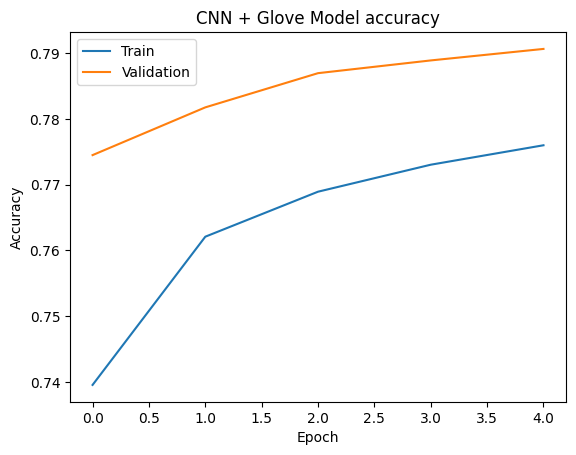

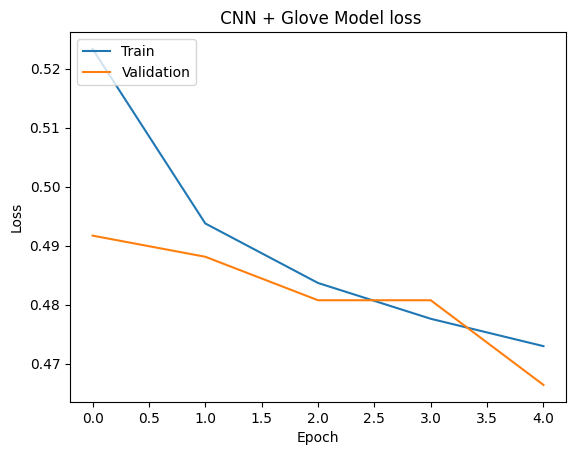

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

data = pd.read_csv('/kaggle/input/twitter-data/processed_twitter_data.csv')

max_words = 50000  
max_len = 100      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_text'])

sequences = tokenizer.texts_to_sequences(data['processed_text'])

X_glove_cnn = pad_sequences(sequences, maxlen=max_len)

y_glove_cnn = data['sentiment'].values

embedding_dim = 100  # Change this if you download a different dimension
glove_path = '/kaggle/working/glove.6B.100d.txt'  # Update the path if necessary

embedding_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_glove_cnn, y_glove_cnn, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len,
                    weights=[embedding_matrix], trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cnn)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN + Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' CNN + Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
CNN+Glove Metrics
Accuracy: 0.7904
Precision: 0.8081
Recall: 0.7635
F1 Score: 0.7851
              precision    recall  f1-score   support

           0       0.77      0.82      0.80    159494
           1       0.81      0.76      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



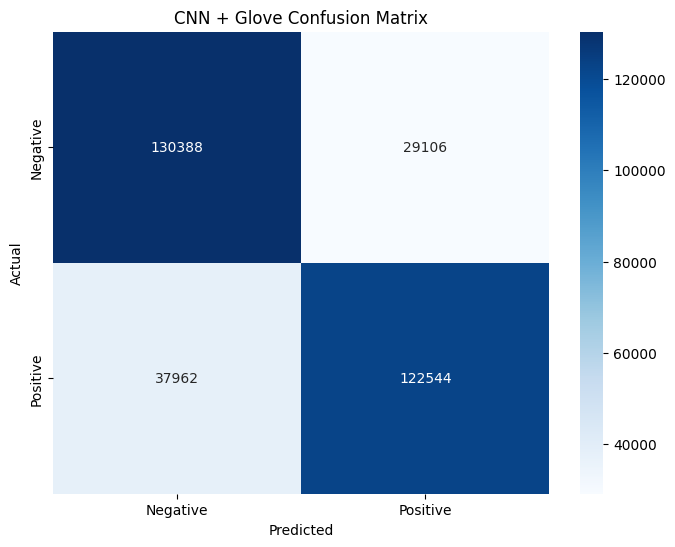

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_cnn = (model.predict(X_test_cnn) > 0.5).astype("int32")

accuracy = accuracy_score(y_test_cnn, y_pred_cnn)

precision = precision_score(y_test_cnn, y_pred_cnn)
recall = recall_score(y_test_cnn, y_pred_cnn)
f1 = f1_score(y_test_cnn, y_pred_cnn)

report = classification_report(y_test_cnn, y_pred_cnn)

print('CNN+Glove Metrics')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(report)

cm = confusion_matrix(y_test_cnn, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CNN + Glove Confusion Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 171s 11ms/step - accuracy: 0.7640 - loss: 0.4837 - val_accuracy: 0.8137 - val_loss: 0.4081
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 166s 10ms/step - accuracy: 0.8164 - loss: 0.4034 - val_accuracy: 0.8191 - val_loss: 0.3991
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 167s 10ms/step - accuracy: 0.8280 - loss: 0.3825 - val_accuracy: 0.8224 - val_loss: 0.3917
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 166s 10ms/step - accuracy: 0.8349 - loss: 0.3695 - val_accuracy: 0.8242 - val_loss: 0.3888
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 167s 10ms/step - accuracy: 0.8406 - loss: 0.3586 - val_accuracy: 0.8257 - val_loss: 0.3876
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.8267 - loss: 0.3848
Test accuracy: 0.8258249759674072


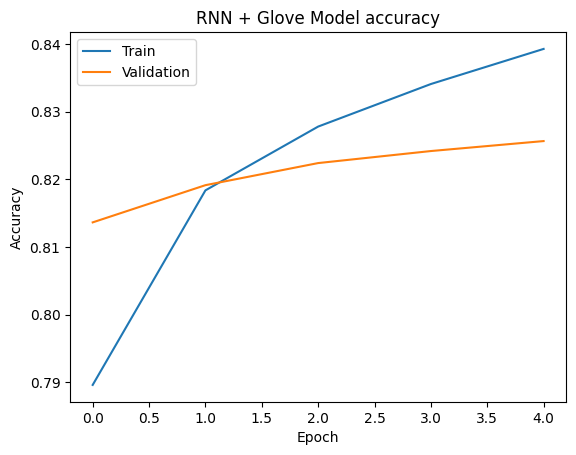

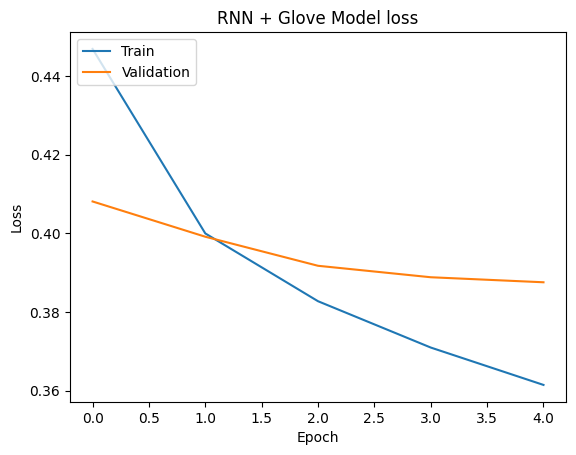

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


data = pd.read_csv('/kaggle/input/twitter-data/processed_twitter_data.csv')

max_words = 50000  
max_len = 100      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_text'])

sequences = tokenizer.texts_to_sequences(data['processed_text'])

X_glove_rnn = pad_sequences(sequences, maxlen=max_len)

y_glove_rnn = data['sentiment'].values

embedding_dim = 100  # Change this if you download a different dimension
glove_path = '/kaggle/working/glove.6B.100d.txt'  # Update the path if necessary

embedding_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_glove_rnn, y_glove_rnn, test_size=0.2, random_state=42)

model_rnn_glove = Sequential()
model_rnn_glove.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_rnn_glove.add(LSTM(128, return_sequences=True))  # LSTM layer
model_rnn_glove.add(LSTM(64))  # Second LSTM layer
model_rnn_glove.add(Dropout(0.5))
model_rnn_glove.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model_rnn_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_glove = model_rnn_glove.fit(X_train_rnn, y_train_rnn, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model_rnn_glove.evaluate(X_test_rnn, y_test_rnn)
print(f'Test accuracy: {test_acc}')

plt.plot(history_rnn_glove.history['accuracy'])
plt.plot(history_rnn_glove.history['val_accuracy'])
plt.title('RNN + Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_rnn_glove.history['loss'])
plt.plot(history_rnn_glove.history['val_loss'])
plt.title('RNN + Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
import pickle

with open('Sentiment-RNN-glove.pickle', 'wb') as file:
    pickle.dump(history_rnn_glove, file)
    
model_rnn_glove.save('RNN_glove_sentiment_model.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step
Accuracy: 0.8258
Precision: 0.8234
Recall: 0.8310
F1 Score: 0.8272
              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159494
           1       0.82      0.83      0.83    160506

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000



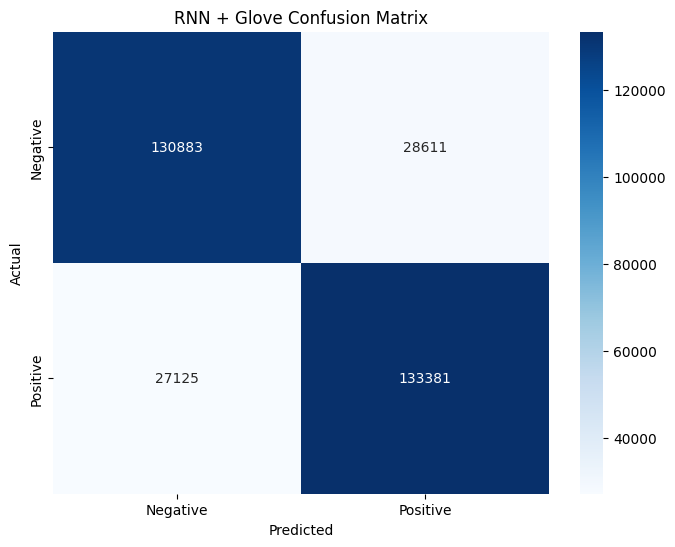

In [16]:
y_pred_rnn_glove = (model_rnn_glove.predict(X_test_rnn) > 0.5).astype("int32")

accuracy_rnn_glove = accuracy_score(y_test_rnn, y_pred_rnn_glove)
precision_rnn_glove = precision_score(y_test_rnn, y_pred_rnn_glove)
recall_rnn_glove = recall_score(y_test_rnn, y_pred_rnn_glove)
f1_rnn_glove = f1_score(y_test_rnn, y_pred_rnn_glove)

report_rnn_glove = classification_report(y_test_rnn, y_pred_rnn_glove)

print(f"Accuracy: {accuracy_rnn_glove:.4f}")
print(f"Precision: {precision_rnn_glove:.4f}")
print(f"Recall: {recall_rnn_glove:.4f}")
print(f"F1 Score: {f1_rnn_glove:.4f}")
print(report_rnn_glove)

cm_rnn_glove = confusion_matrix(y_test_rnn, y_pred_rnn_glove)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn_glove, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RNN + Glove Confusion Matrix')
plt.show()

In [17]:
!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-09-27 13:54:32--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2024-09-27 13:54:32--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: 'glove.twitter.27B.zip'

glove.twitter.27B.z 100%[===================>]   1.42G  5.02MB/s    in 4m 45s  

2024-09-27 13:59:17 (5.09 MB/s) - 'glove.twitter.27B.zip' saved [1520408563/1520408563]

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.7556 - loss: 0.4997 - val_accuracy: 0.8008 - val_loss: 0.4382
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.7920 - loss: 0.4477 - val_accuracy: 0.8060 - val_loss: 0.4295
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.7974 - loss: 0.4387 - val_accuracy: 0.8087 - val_loss: 0.4248
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.8012 - loss: 0.4323 - val_accuracy: 0.8074 - val_loss: 0.4205
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.8028 - loss: 0.4287 - val_accuracy: 0.8121 - val_loss: 0.4230
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8131 - loss: 0.4213
Test accuracy: 0.8129718899726868


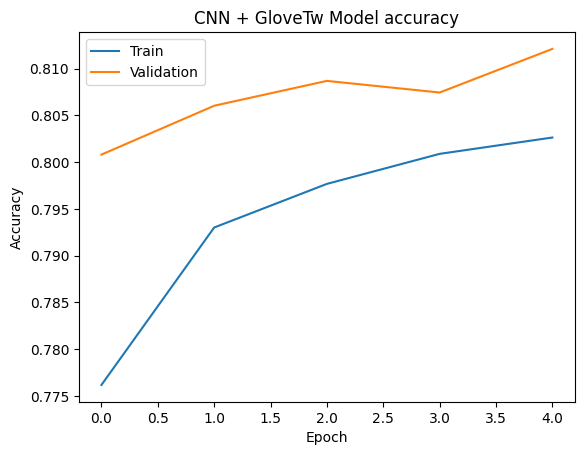

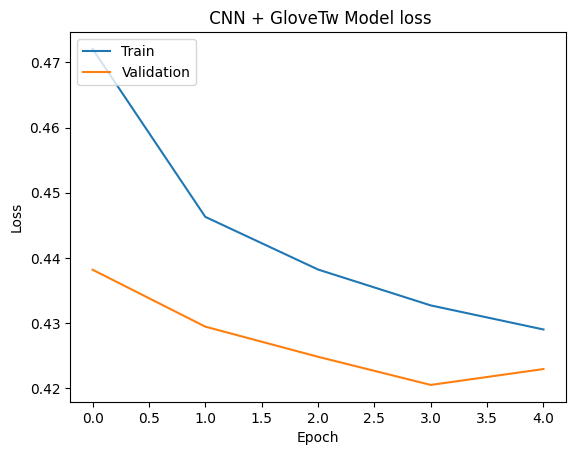

In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

data = pd.read_csv('/kaggle/input/twitter-data/processed_twitter_data.csv')

max_words = 50000  
max_len = 100      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_text'])

sequences = tokenizer.texts_to_sequences(data['processed_text'])
X_glovetw = pad_sequences(sequences, maxlen=max_len)


y_glovetw = data['sentiment'].values


embedding_dim = 200  
glove_path = '/kaggle/working/glove.twitter.27B.200d.txt' 


embedding_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

X_train_cnn_glove, X_test_cnn_glove, y_train_cnn_glove, y_test_cnn_glove = train_test_split(X_glovetw, y_glovetw, test_size=0.2, random_state=42)

model_glovetw_cnn = Sequential()
model_glovetw_cnn.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len,
                    weights=[embedding_matrix], trainable=False))
model_glovetw_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_glovetw_cnn.add(GlobalMaxPooling1D())
model_glovetw_cnn.add(Dropout(0.5))
model_glovetw_cnn.add(Dense(128, activation='relu'))
model_glovetw_cnn.add(Dropout(0.5))
model_glovetw_cnn.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model_glovetw_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_glovetw_cnn = model_glovetw_cnn.fit(X_train_cnn_glove, y_train_cnn_glove, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model_glovetw_cnn.evaluate(X_test_cnn_glove, y_test_cnn_glove)
print(f'Test accuracy: {test_acc}')

plt.plot(history_glovetw_cnn.history['accuracy'])
plt.plot(history_glovetw_cnn.history['val_accuracy'])
plt.title('CNN + GloveTw Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_glovetw_cnn.history['loss'])
plt.plot(history_glovetw_cnn.history['val_loss'])
plt.title(' CNN + GloveTw Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
import pickle

with open('Sentiment-CNN-glovetw.pickle', 'wb') as file:
    pickle.dump(history_glovetw_cnn, file)
    
model_glovetw_cnn.save('CNN_glovetw_sentiment_model.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
CNN+GloveTw Metrics
Accuracy: 0.8130
Precision: 0.8295
Recall: 0.7894
F1 Score: 0.8090
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    159494
           1       0.83      0.79      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



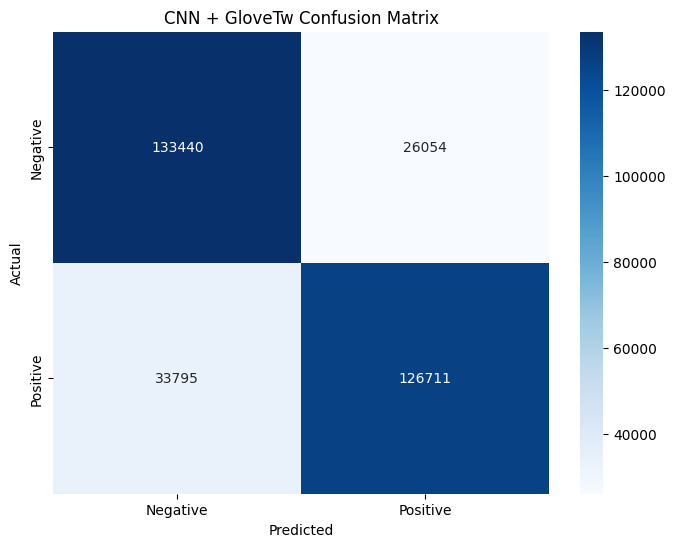

In [19]:
y_pred_cnn_glovetw = (model_glovetw_cnn.predict(X_test_cnn_glove) > 0.5).astype("int32")

accuracy_glove = accuracy_score(y_test_cnn_glove, y_pred_cnn_glovetw)

precision_glove = precision_score(y_test_cnn_glove, y_pred_cnn_glovetw)
recall_glove = recall_score(y_test_cnn_glove, y_pred_cnn_glovetw)
f1_glove = f1_score(y_test_cnn_glove, y_pred_cnn_glovetw)

report_glove = classification_report(y_test_cnn_glove, y_pred_cnn_glovetw)

print('CNN+GloveTw Metrics')
print(f"Accuracy: {accuracy_glove:.4f}")
print(f"Precision: {precision_glove:.4f}")
print(f"Recall: {recall_glove:.4f}")
print(f"F1 Score: {f1_glove:.4f}")
print(report_glove)

cm_glove = confusion_matrix(y_test_cnn_glove, y_pred_cnn_glovetw)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_glove, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CNN + GloveTw Confusion Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 179s 11ms/step - accuracy: 0.7941 - loss: 0.4395 - val_accuracy: 0.8275 - val_loss: 0.3812
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 177s 11ms/step - accuracy: 0.8337 - loss: 0.3717 - val_accuracy: 0.8327 - val_loss: 0.3716
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 177s 11ms/step - accuracy: 0.8451 - loss: 0.3512 - val_accuracy: 0.8349 - val_loss: 0.3696
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 178s 11ms/step - accuracy: 0.8519 - loss: 0.3365 - val_accuracy: 0.8350 - val_loss: 0.3687
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 179s 11ms/step - accuracy: 0.8577 - loss: 0.3247 - val_accuracy: 0.8352 - val_loss: 0.3731
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8345 - loss: 0.3707
Test accuracy: 0.8345062732696533


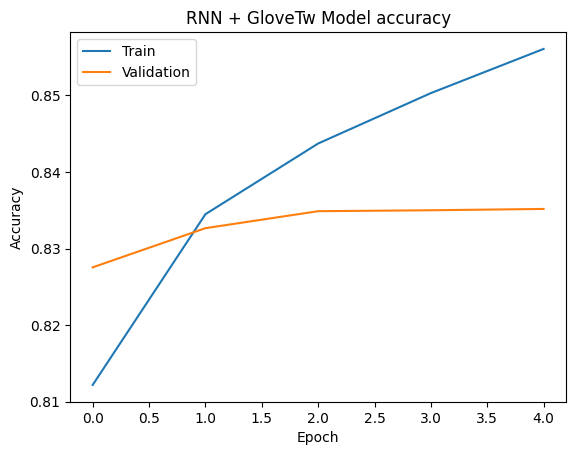

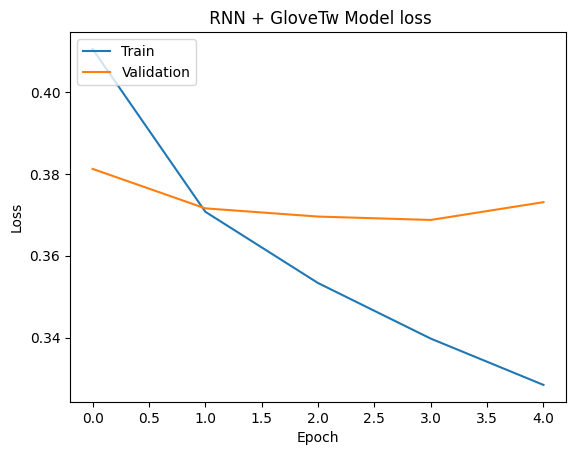

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model_rnn_glovetw = Sequential()
model_rnn_glovetw.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_rnn_glovetw.add(LSTM(128, return_sequences=True))  # LSTM layer
model_rnn_glovetw.add(LSTM(64))  # Second LSTM layer
model_rnn_glovetw.add(Dropout(0.5))
model_rnn_glovetw.add(Dense(1, activation='sigmoid'))

model_rnn_glovetw.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn_glovetw = model_rnn_glovetw.fit(X_train_cnn_glove, y_train_cnn_glove, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model_rnn_glovetw.evaluate(X_test_cnn_glove, y_test_cnn_glove)
print(f'Test accuracy: {test_acc}')

plt.plot(history_rnn_glovetw.history['accuracy'])
plt.plot(history_rnn_glovetw.history['val_accuracy'])
plt.title('RNN + GloveTw Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_rnn_glovetw.history['loss'])
plt.plot(history_rnn_glovetw.history['val_loss'])
plt.title(' RNN + GloveTw Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
import pickle

with open('Sentiment-RNN-glovetw.pickle', 'wb') as file:
    pickle.dump(history_rnn_glovetw, file)
    
model_rnn_glovetw.save('RNN_glovetw_sentiment_model.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
RNN+GloveTw Metrics
Accuracy: 0.8345
Precision: 0.8336
Recall: 0.8371
F1 Score: 0.8354
              precision    recall  f1-score   support

           0       0.84      0.83      0.83    159494
           1       0.83      0.84      0.84    160506

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000



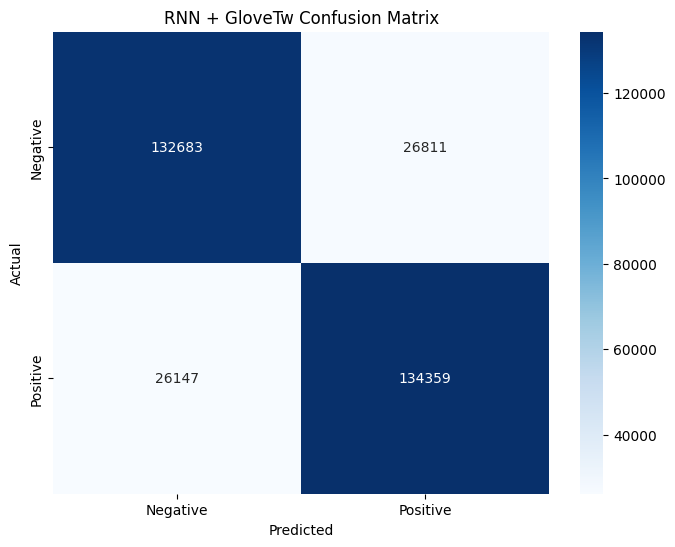

In [21]:
y_pred_rnn_glovetw = (model_rnn_glovetw.predict(X_test_cnn_glove) > 0.5).astype("int32")

accuracy_rnn_glovetw = accuracy_score(y_test_cnn_glove, y_pred_rnn_glovetw)

precision_rnn_glovetw = precision_score(y_test_cnn_glove, y_pred_rnn_glovetw)
recall_rnn_glovetw = recall_score(y_test_cnn_glove, y_pred_rnn_glovetw)
f1_rnn_glovetw = f1_score(y_test_cnn_glove, y_pred_rnn_glovetw)

report_rnn_glovetw = classification_report(y_test_cnn_glove, y_pred_rnn_glovetw)

print('RNN+GloveTw Metrics')
print(f"Accuracy: {accuracy_rnn_glovetw:.4f}")
print(f"Precision: {precision_rnn_glovetw:.4f}")
print(f"Recall: {recall_rnn_glovetw:.4f}")
print(f"F1 Score: {f1_rnn_glovetw:.4f}")
print(report_rnn_glovetw)

cm_rnn_glovetw = confusion_matrix(y_test_cnn_glove, y_pred_rnn_glovetw)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn_glovetw, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RNN + GloveTw Confusion Matrix')
plt.show()

In [22]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-09-27 14:42:59--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.126, 18.238.176.19, 18.238.176.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: 'cc.en.300.bin.gz'

cc.en.300.bin.gz    100%[===================>]   4.19G   221MB/s    in 20s     

2024-09-27 14:43:19 (217 MB/s) - 'cc.en.300.bin.gz' saved [4503593528/4503593528]



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.7446 - loss: 0.5149 - val_accuracy: 0.7953 - val_loss: 0.4467
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7852 - loss: 0.4578 - val_accuracy: 0.8020 - val_loss: 0.4324
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7925 - loss: 0.4464 - val_accuracy: 0.8061 - val_loss: 0.4273
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7967 - loss: 0.4398 - val_accuracy: 0.8078 - val_loss: 0.4244
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7993 - loss: 0.4343 - val_accuracy: 0.8095 - val_loss: 0.4245
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8083 - loss: 0.4235
Test accuracy: 0.8089249730110168


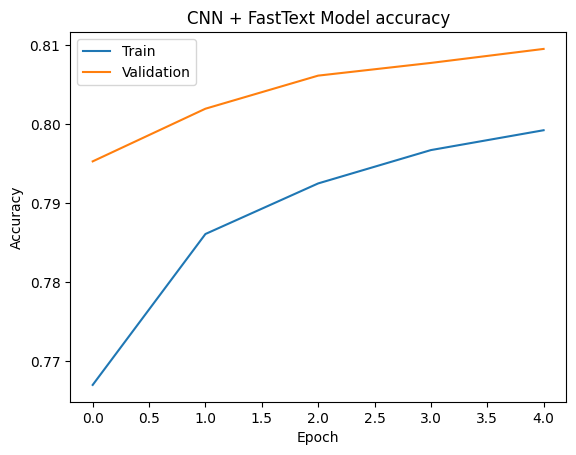

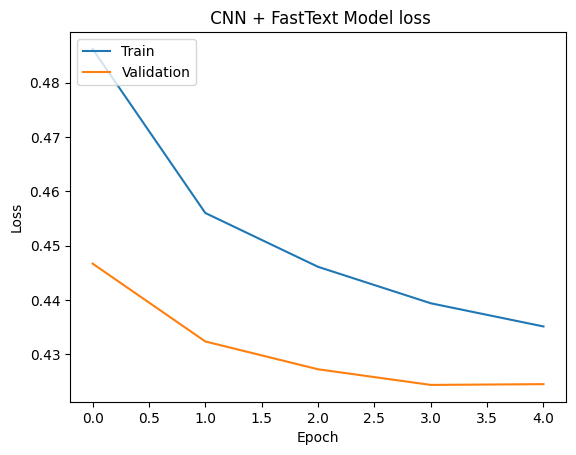

In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import fasttext

data = pd.read_csv('/kaggle/input/twitter-data/processed_twitter_data.csv')

max_words = 50000  
max_len = 100      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_text'])

sequences = tokenizer.texts_to_sequences(data['processed_text'])
X_fasttext = pad_sequences(sequences, maxlen=max_len)

y_fasttext = data['sentiment'].values

embedding_dim = 300  
fasttext_model = fasttext.load_model('/kaggle/working/cc.en.300.bin')

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = fasttext_model.get_word_vector(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

X_train_fasttext, X_test_fasttext, y_train_fasttext, y_test_fasttext = train_test_split(X_fasttext, y_fasttext, test_size=0.2, random_state=42)

model_cnn_fastext = Sequential()
model_cnn_fastext.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len,
                    weights=[embedding_matrix], trainable=False))
model_cnn_fastext.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn_fastext.add(GlobalMaxPooling1D())
model_cnn_fastext.add(Dropout(0.5))
model_cnn_fastext.add(Dense(128, activation='relu'))
model_cnn_fastext.add(Dropout(0.5))
model_cnn_fastext.add(Dense(1, activation='sigmoid'))

model_cnn_fastext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_cnn_fastext = model_cnn_fastext.fit(X_train_fasttext, y_train_fasttext, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model_cnn_fastext.evaluate(X_test_fasttext, y_test_fasttext)
print(f'Test accuracy: {test_acc}')

plt.plot(history_cnn_fastext.history['accuracy'])
plt.plot(history_cnn_fastext.history['val_accuracy'])
plt.title('CNN + FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_cnn_fastext.history['loss'])
plt.plot(history_cnn_fastext.history['val_loss'])
plt.title(' CNN + FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
import pickle

with open('Sentiment-CNN-fasttext.pickle', 'wb') as file:
    pickle.dump(history_cnn_fastext, file)
    
model_cnn_fastext.save('CNN_fasttext_sentiment_model.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
CNN+FastText Metrics
Accuracy: 0.8089
Precision: 0.8262
Recall: 0.7840
F1 Score: 0.8045
              precision    recall  f1-score   support

           0       0.79      0.83      0.81    159494
           1       0.83      0.78      0.80    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



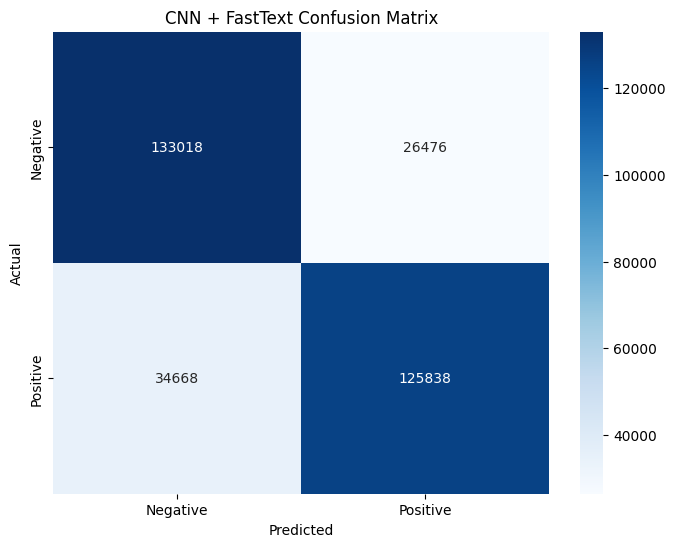

In [25]:
y_pred_cnn_fastext = (model_cnn_fastext.predict(X_test_fasttext) > 0.5).astype("int32")

accuracy_cnn_fasttext = accuracy_score(y_test_fasttext, y_pred_cnn_fastext)

precision_cnn_fasttext = precision_score(y_test_fasttext, y_pred_cnn_fastext)
recall_cnn_fasttext = recall_score(y_test_fasttext, y_pred_cnn_fastext)
f1_cnn_fasttext = f1_score(y_test_fasttext, y_pred_cnn_fastext)

report_cnn_fasttext = classification_report(y_test_fasttext, y_pred_cnn_fastext)

print('CNN+FastText Metrics')
print(f"Accuracy: {accuracy_cnn_fasttext:.4f}")
print(f"Precision: {precision_cnn_fasttext:.4f}")
print(f"Recall: {recall_cnn_fasttext:.4f}")
print(f"F1 Score: {f1_cnn_fasttext:.4f}")
print(report_cnn_fasttext)

cm_cnn_fasttext = confusion_matrix(y_test_fasttext, y_pred_cnn_fastext)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn_fasttext, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CNN + FastText Confusion Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 194s 12ms/step - accuracy: 0.7787 - loss: 0.4645 - val_accuracy: 0.8181 - val_loss: 0.3990
Epoch 2/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 191s 12ms/step - accuracy: 0.8225 - loss: 0.3925 - val_accuracy: 0.8280 - val_loss: 0.3816
Epoch 3/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 192s 12ms/step - accuracy: 0.8337 - loss: 0.3713 - val_accuracy: 0.8327 - val_loss: 0.3740
Epoch 4/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 192s 12ms/step - accuracy: 0.8418 - loss: 0.3574 - val_accuracy: 0.8348 - val_loss: 0.3704
Epoch 5/5
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 191s 12ms/step - accuracy: 0.8473 - loss: 0.3457 - val_accuracy: 0.8352 - val_loss: 0.3706
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.8356 - loss: 0.3682
Test accuracy: 0.8353219032287598


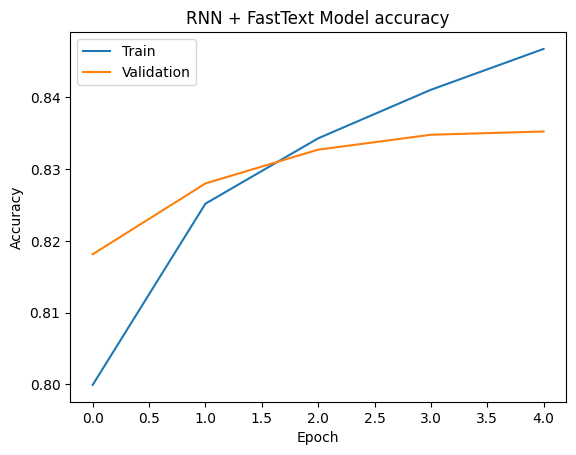

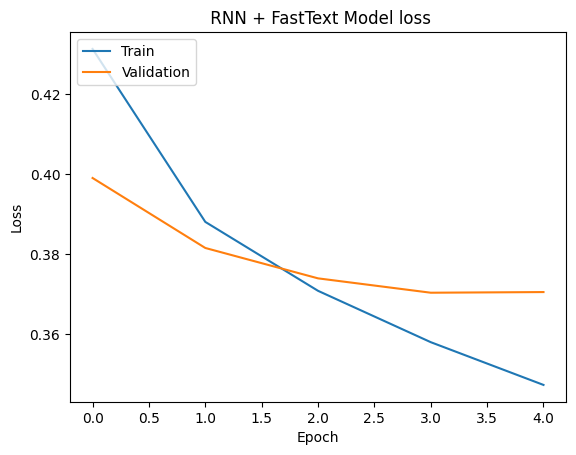

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model_rnn_fasttext = Sequential()
model_rnn_fasttext.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_rnn_fasttext.add(LSTM(128, return_sequences=True))  # LSTM layer
model_rnn_fasttext.add(LSTM(64))  # Second LSTM layer
model_rnn_fasttext.add(Dropout(0.5))
model_rnn_fasttext.add(Dense(1, activation='sigmoid'))

model_rnn_fasttext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn_fasttext = model_rnn_fasttext.fit(X_train_fasttext, y_train_fasttext, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model_rnn_fasttext.evaluate(X_test_fasttext, y_test_fasttext)
print(f'Test accuracy: {test_acc}')

plt.plot(history_rnn_fasttext.history['accuracy'])
plt.plot(history_rnn_fasttext.history['val_accuracy'])
plt.title('RNN + FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_rnn_fasttext.history['loss'])
plt.plot(history_rnn_fasttext.history['val_loss'])
plt.title(' RNN + FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
import pickle

with open('Sentiment-RNN-fasttext.pickle', 'wb') as file:
    pickle.dump(history_rnn_fasttext, file)
    
model_rnn_fasttext.save('RNN_fasttext_sentiment_model.h5')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
RNN+FastText Metrics
Accuracy: 0.8353
Precision: 0.8444
Recall: 0.8235
F1 Score: 0.8338
              precision    recall  f1-score   support

           0       0.83      0.85      0.84    159494
           1       0.84      0.82      0.83    160506

    accuracy                           0.84    320000
   macro avg       0.84      0.84      0.84    320000
weighted avg       0.84      0.84      0.84    320000



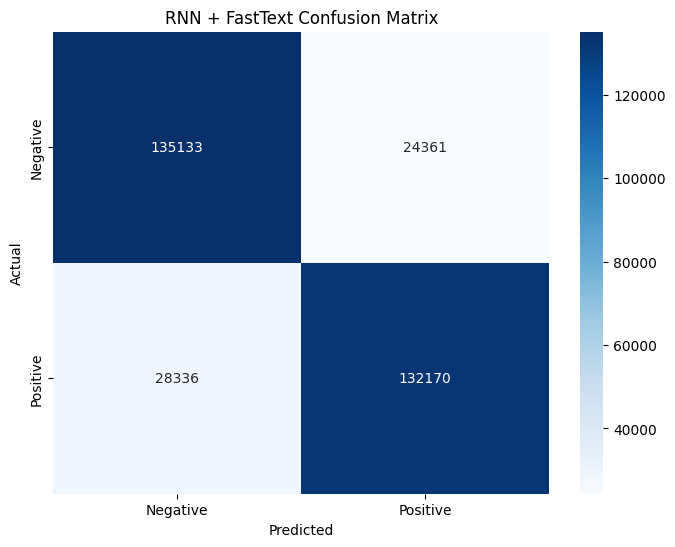

In [28]:
y_pred_rnn_fastext = (model_rnn_fasttext.predict(X_test_fasttext) > 0.5).astype("int32")

accuracy_rnn_fasttext = accuracy_score(y_test_fasttext, y_pred_rnn_fastext)

precision_rnn_fasttext = precision_score(y_test_fasttext, y_pred_rnn_fastext)
recall_rnn_fasttext = recall_score(y_test_fasttext, y_pred_rnn_fastext)
f1_rnn_fasttext = f1_score(y_test_fasttext, y_pred_rnn_fastext)

report_rnn_fasttext = classification_report(y_test_fasttext, y_pred_rnn_fastext)

print('RNN+FastText Metrics')
print(f"Accuracy: {accuracy_rnn_fasttext:.4f}")
print(f"Precision: {precision_rnn_fasttext:.4f}")
print(f"Recall: {recall_rnn_fasttext:.4f}")
print(f"F1 Score: {f1_rnn_fasttext:.4f}")
print(report_rnn_fasttext)

cm_rnn_fasttext = confusion_matrix(y_test_fasttext, y_pred_rnn_fastext)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn_fasttext, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RNN + FastText Confusion Matrix')
plt.show()